<a href="https://colab.research.google.com/github/leohhhn/multilayer_perceptron/blob/main/Neuronske_Mre%C5%BEe_Doma%C4%87i_zadatak_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
## file paths
training_inputs = '/content/training_data.csv'
validation_inputs = '/content/validation_data.csv'

## reading csv files with pandas, renaming inputs for readability
training_inputs = pd.read_csv(training_inputs, sep=',', dtype='float')
training_inputs.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
            'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
validation_inputs = pd.read_csv(validation_inputs, sep=',', dtype='float')
validation_inputs.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
            'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']

In [ ]:
## format x & y values for training
training_X = np.array(training_inputs.loc[:,'snoring_rate':'heart_rate'])
training_y = np.array(training_inputs.loc[:,'stress_level'])
## format validation values, 20% of all input data
validation_X = np.array(validation_inputs.loc[:,'snoring_rate':'heart_rate'])
validation_y = np.array(validation_inputs.loc[:, 'stress_level'])

In [ ]:
## categorizing outputs with one-hot vectors
training_y = tf.keras.utils.to_categorical(training_y, num_classes=5, dtype='float')
validation_y = tf.keras.utils.to_categorical(validation_y, num_classes=5, dtype='float')

In [ ]:
## create models
def make_model(model_id): 
  model = tf.keras.models.Sequential()
  
  if model_id == 0: 
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))
    #model.name = "Model 0 - Quad Eights"
  elif model_id == 1:
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))
   # model.name = "Model 1 - Double 128"
  elif model_id == 2:
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(5, activation='softmax'))
   # model.name = "Model 2 - Exponential neuron decrease"
  else:
    print("Error: model_id must be [0,2].")

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
def fit_model(model_id):
  model = make_model(model_id)

  ## log traning data
  f = open(f'model_{model_id}_log.csv', "w+")
  f.close()

  from keras.callbacks import CSVLogger
  csv_logger = CSVLogger(f'model_{model_id}_log.csv', append=True, separator=';')

  ## fit model
  history = model.fit(training_X, training_y, epochs=50, validation_split=0.2, callbacks=[csv_logger])

  model.summary()
  # ## calculate accuracy
  # accuracy = model.evaluate(validation_X, validation_y)
  # print(accuracy)
  
  return history

In [ ]:
def plot_acc(history):
  ## plot accuracy for training and validation sets
  stats_df=pd.DataFrame(history.history)
  stats_df['epoch']=list(range(50))
  plt.figure(figsize=(10, 8))
  sb.lineplot(y='accuracy', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training accuracy")
  sb.lineplot(y='val_accuracy', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, \
              label="Validation accuracy")
  plt.grid()
  plt.legend()
  plt.title(f"Training and validation accuracy for {history.model.name}")
  plt.xticks(range(0, 51, 5));

In [ ]:
def plot_loss(history):
  ## plot loss for training and validation
  stats_df=pd.DataFrame(history.history)
  stats_df['epoch']=list(range(50))
  plt.figure(figsize=(10, 8))
  sb.lineplot(y='loss', x='epoch', data=stats_df, color='deeppink', linewidth=2.5, label="Training loss")
  sb.lineplot(y='val_loss', x='epoch', data=stats_df, color='darkturquoise', linewidth=2.5, label="Validation loss")
  plt.grid()
  plt.legend()
  plt.title(f"Training and validation loss for {history.model.name}")
  plt.xticks(range(0, 50, 5));

In [ ]:
def load_output(model_id):
  # load & print log.csv
  output_data  = pd.read_csv(f'model_{model_id}_log.csv', sep=';', dtype='float')
  return output_data

Ispod ove linije se pokreće treniranje i ispisivanje sva 3 modela.

In [ ]:
## fit model 0
history = fit_model(0)

Epoch 1/50
13/13 [==============================] - 1s 16ms/step - loss: 13.7440 - accuracy: 0.1787 - val_loss: 9.1528 - val_accuracy: 0.1881
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 6.0634 - accuracy: 0.1811 - val_loss: 3.4956 - val_accuracy: 0.0495
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 2.4408 - accuracy: 0.3722 - val_loss: 1.8534 - val_accuracy: 0.4554
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 1.3603 - accuracy: 0.4888 - val_loss: 1.2401 - val_accuracy: 0.3960
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 1.1445 - accuracy: 0.3226 - val_loss: 1.0929 - val_accuracy: 0.4059
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 1.0924 - accuracy: 0.3772 - val_loss: 1.0511 - val_accuracy: 0.4455
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 1.0459 - accuracy: 0.4715 - val_loss: 1.0095 - val_accuracy: 0.3762
Epoch 8/50
13/13 [

Plotting model: Quad 16ths


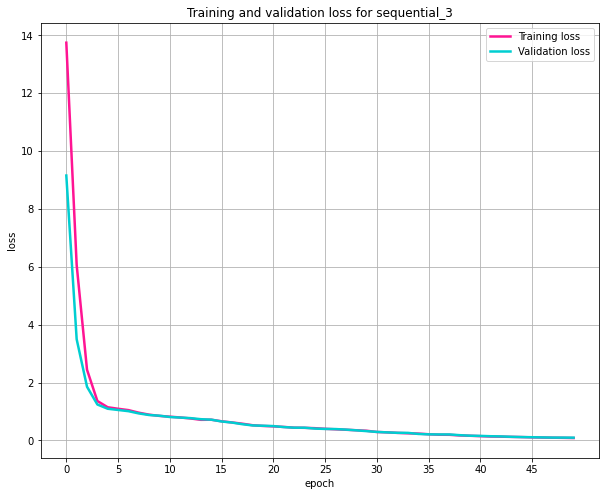

In [ ]:
print("Plotting model: Quad 16ths")
plot_loss(history)

Plotting model: Quad 16ths


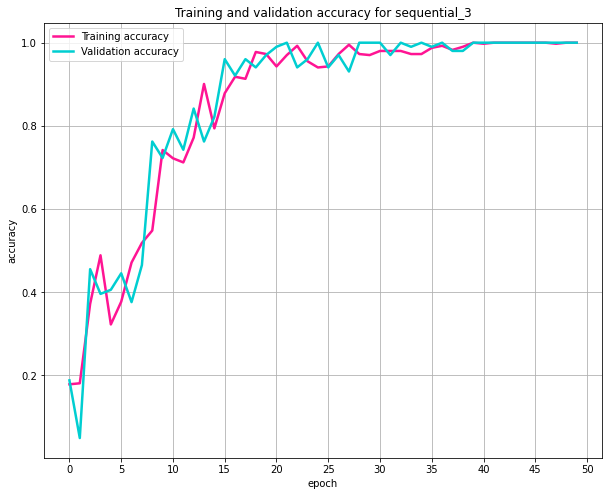

In [ ]:
print("Plotting model: Quad 16ths")
plot_acc(history)

In [ ]:
t = load_output(0)
print('Loading output data for model 0')
t

Loading output data for model 0


,epoch,accuracy,loss,val_accuracy,val_loss
0,0.0,0.178660,13.743999,0.188119,9.152829
1,1.0,0.181141,6.063402,0.049505,3.495585
2,2.0,0.372208,2.440762,0.455446,1.853414
3,3.0,0.488834,1.360279,0.396040,1.240062
4,4.0,0.322581,1.144520,0.405941,1.092931
5,5.0,0.377171,1.092417,0.445545,1.051121
6,6.0,0.471464,1.045916,0.376238,1.009479
7,7.0,0.518610,0.956782,0.465347,0.931691
8,8.0,0.548387,0.888417,0.762376,0.876231
9,9.0,0.741935,0.845659,0.722772,0.852664


In [ ]:
## fit model 1
history = fit_model(1)

Epoch 1/50
13/13 [==============================] - 1s 18ms/step - loss: 11.6411 - accuracy: 0.1663 - val_loss: 5.4847 - val_accuracy: 0.3168
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 3.0039 - accuracy: 0.3350 - val_loss: 1.5415 - val_accuracy: 0.3366
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 1.0055 - accuracy: 0.5434 - val_loss: 0.8004 - val_accuracy: 0.5941
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5696 - accuracy: 0.7370 - val_loss: 0.5556 - val_accuracy: 0.7129
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.3891 - accuracy: 0.8883 - val_loss: 0.3441 - val_accuracy: 0.9604
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.3115 - accuracy: 0.9603 - val_loss: 0.3246 - val_accuracy: 0.9307
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.2675 - accuracy: 0.9653 - val_loss: 0.2671 - val_accuracy: 0.9703
Epoch 8/50
13/13 [

Plotting model: Double 128


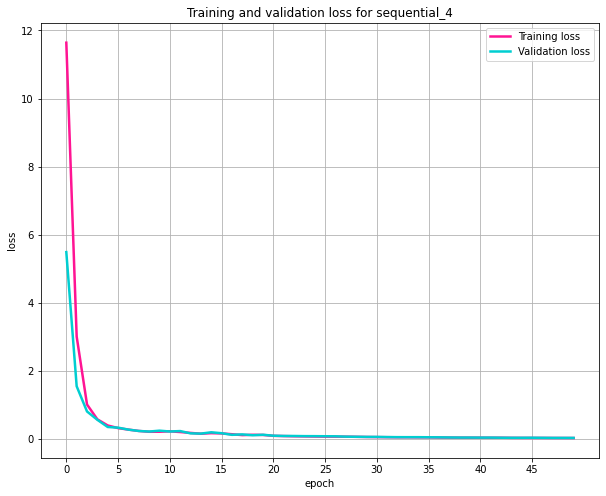

In [ ]:
print("Plotting model: Double 128")
plot_loss(history)

Plotting model: Double 128


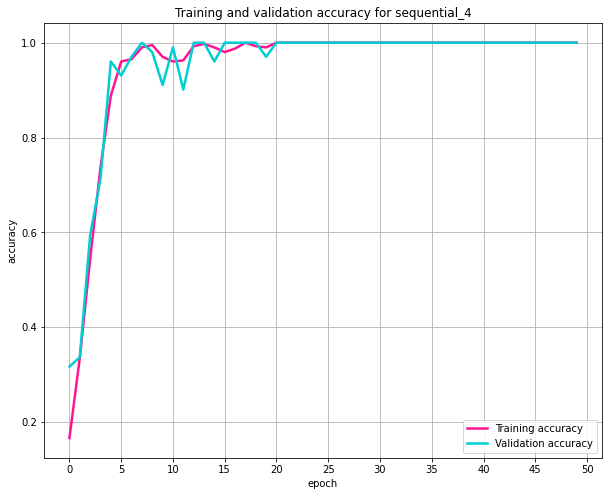

In [ ]:
print("Plotting model: Double 128")
plot_acc(history)

In [ ]:
t = load_output(1)
print('Loading output data for model 1')
t

Loading output data for model 1


,epoch,accuracy,loss,val_accuracy,val_loss
0,0.0,0.166253,11.641121,0.316832,5.484651
1,1.0,0.334988,3.003863,0.336634,1.541469
2,2.0,0.543424,1.005540,0.594059,0.800352
3,3.0,0.736973,0.569626,0.712871,0.555604
4,4.0,0.888337,0.389115,0.960396,0.344072
5,5.0,0.960298,0.311477,0.930693,0.324619
6,6.0,0.965261,0.267515,0.970297,0.267091
7,7.0,0.990074,0.227813,1.000000,0.227589
8,8.0,0.995037,0.203715,0.980198,0.210472
9,9.0,0.970223,0.205108,0.910891,0.236011


In [ ]:
## fit model 2
history = fit_model(2)

Epoch 1/50
13/13 [==============================] - 1s 17ms/step - loss: 3.5664 - accuracy: 0.3424 - val_loss: 1.7683 - val_accuracy: 0.3762
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 1.4695 - accuracy: 0.4913 - val_loss: 1.1494 - val_accuracy: 0.4851
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 1.0618 - accuracy: 0.4640 - val_loss: 1.0263 - val_accuracy: 0.5248
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.9016 - accuracy: 0.6055 - val_loss: 0.8505 - val_accuracy: 0.7921
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.8112 - accuracy: 0.7469 - val_loss: 0.7547 - val_accuracy: 0.8020
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.8213 - val_loss: 0.6414 - val_accuracy: 0.8614
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6248 - accuracy: 0.8784 - val_loss: 0.5643 - val_accuracy: 0.8713
Epoch 8/50
13/13 [=

Plotting model: Exponential neuron decrease


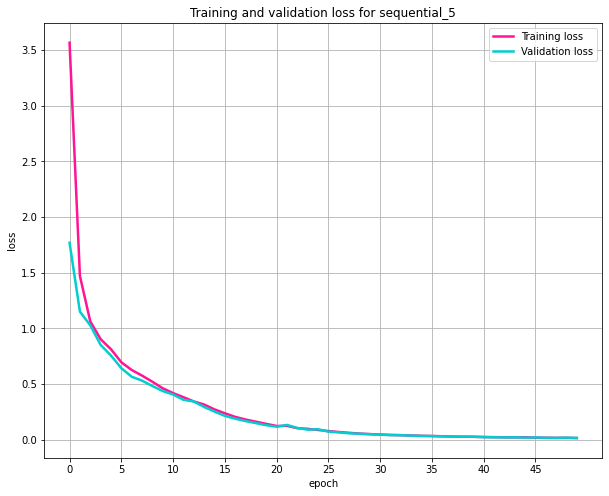

In [ ]:
print("Plotting model: Exponential neuron decrease")
plot_loss(history)

Plotting model: Exponential neuron decrease


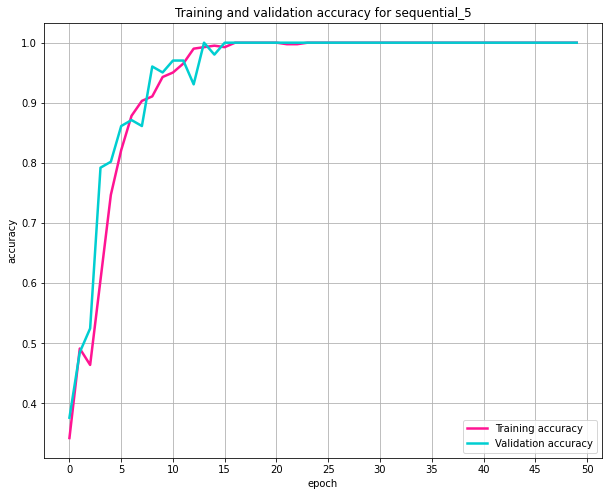

In [ ]:
print("Plotting model: Exponential neuron decrease")
plot_acc(history)

In [ ]:
t = load_output(2)
print('Loading output data for model 2')
t

Loading output data for model 2


,epoch,accuracy,loss,val_accuracy,val_loss
0,0.0,0.342432,3.566413,0.376238,1.768340
1,1.0,0.491315,1.469488,0.485149,1.149374
2,2.0,0.464020,1.061765,0.524752,1.026278
3,3.0,0.605459,0.901629,0.792079,0.850549
4,4.0,0.746898,0.811217,0.801980,0.754686
5,5.0,0.821340,0.694360,0.861386,0.641448
6,6.0,0.878412,0.624798,0.871287,0.564270
7,7.0,0.903226,0.574389,0.861386,0.529386
8,8.0,0.910670,0.519018,0.960396,0.480859
9,9.0,0.942928,0.460262,0.950495,0.435582
